In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
im=plt.imread('data/melanoma_preprocessed/0_Melanoma/ISIC_0000307.jpg')
mask=plt.imread('data/segm_melanoma_preprocessed/0_Melanoma/ISIC_0000307_segmentation.jpeg')

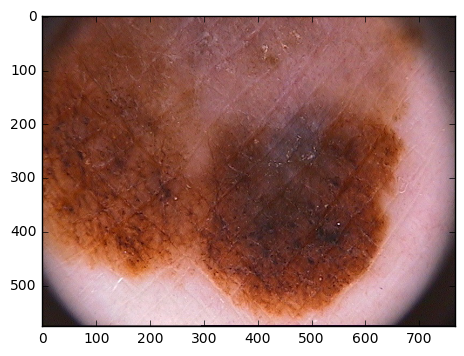

In [3]:
plt.imshow(im)

In [4]:
gray=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh=cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

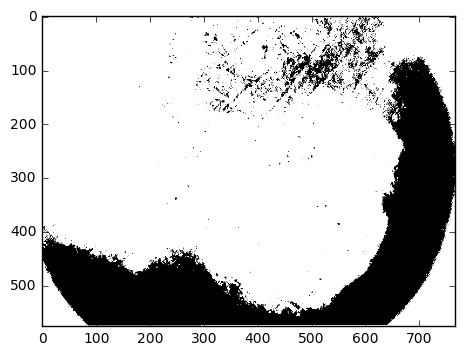

In [5]:
plt.imshow(thresh, cmap='gray')

In [6]:
kernel=np.ones((3,3), np.uint8)
opening=cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg=cv2.dilate(opening, kernel, iterations=3)

dist_transform=cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform,0.09*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [7]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1

markers[unknown==255] = 0

In [8]:
markers = cv2.watershed(im,markers)

im[markers == -1] = [255,0,0]

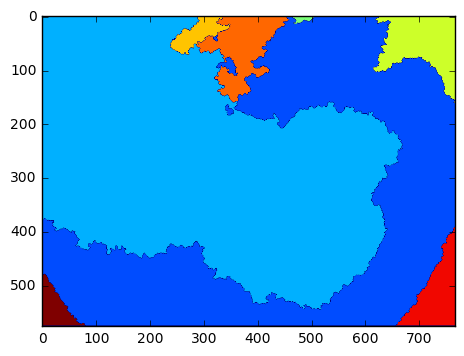

In [9]:
plt.imshow(markers)

In [24]:
im_mask=cv2.subtract(mask, im)
im_mask1=cv2.bitwise_and(im, mask = mask)

TypeError: Required argument 'src2' (pos 2) not found

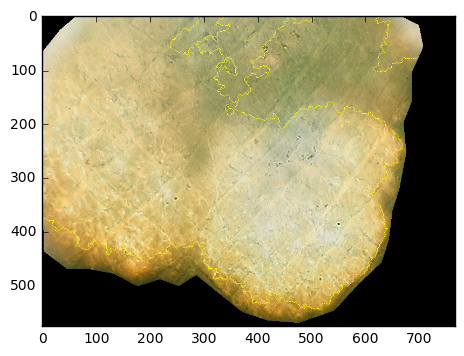

In [22]:
plt.imshow(cv2.cvtColor(im_mask, cv2.COLOR_BGR2RGB))